In [1]:
'''monthly robberies data set'''
import pandas as pd
import math
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from matplotlib import pyplot as plt
#load data set
data_series = pd.read_csv('./data/robberies.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

#split data set into model development data set and cross validation set, use last year of data as cv
data_end = len(data_series) - 12
data_set, cv_set = data_series[0:data_end], data_series[data_end::]
print(f'Data set: {len(data_set)} months, Validation set: {len(cv_set)} months')

#save training and cv sets to csv format
data_set.to_csv('data_set.csv', header = False)
cv_set.to_csv('cv_set.csv', header = False)

Data set: 106 months, Validation set: 12 months


In [2]:
#create training set and test set
data = pd.read_csv('data_set.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
X = data.values
X = X.astype('float32')

#start with train set of 50%
train_size = int(0.5*len(X))
train_set, test_set = X[0:train_size], X[train_size::]

In [3]:
#use walk forward validation to create baseline prediction forecast using the persistence model
#create foreacst history
historic_obs = [x for x in train_set]
#create baseline predictions
predictions = []
for i in range(len(test_set)):
    #make prediction at t using observation at t-1
    y_hat = historic_obs[-1]
    predictions.append(y_hat)
    #actual t observation from test set
    observation = test_set[i]
    #update historic observations with actual t observation
    historic_obs.append(observation)
    print(f'Predicted: {y_hat: .3f}, Expected: {observation: .3f}')
#report the performance of the forecast using RMSE
rmse = sqrt(mse(test_set, predictions))
print(f'RMSE: {rmse: .3f}')

Predicted:  98.000, Expected:  125.000
Predicted:  125.000, Expected:  155.000
Predicted:  155.000, Expected:  190.000
Predicted:  190.000, Expected:  236.000
Predicted:  236.000, Expected:  189.000
Predicted:  189.000, Expected:  174.000
Predicted:  174.000, Expected:  178.000
Predicted:  178.000, Expected:  136.000
Predicted:  136.000, Expected:  161.000
Predicted:  161.000, Expected:  171.000
Predicted:  171.000, Expected:  149.000
Predicted:  149.000, Expected:  184.000
Predicted:  184.000, Expected:  155.000
Predicted:  155.000, Expected:  276.000
Predicted:  276.000, Expected:  224.000
Predicted:  224.000, Expected:  213.000
Predicted:  213.000, Expected:  279.000
Predicted:  279.000, Expected:  268.000
Predicted:  268.000, Expected:  287.000
Predicted:  287.000, Expected:  238.000
Predicted:  238.000, Expected:  213.000
Predicted:  213.000, Expected:  257.000
Predicted:  257.000, Expected:  293.000
Predicted:  293.000, Expected:  212.000
Predicted:  212.000, Expected:  246.000
P

In [4]:
# show summary statistics of data_set time series
print(data_set.describe())

count    106.000000
mean     173.103774
std      112.231133
min       29.000000
25%       74.750000
50%      144.500000
75%      271.750000
max      487.000000
Name: Robberies, dtype: float64


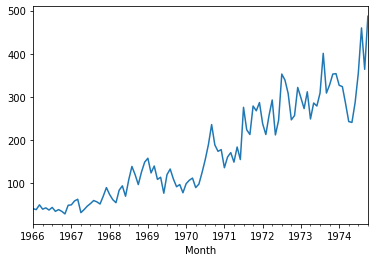

In [5]:
#plot the data
data_set.plot()
plt.show()

In [6]:
### (Observations)

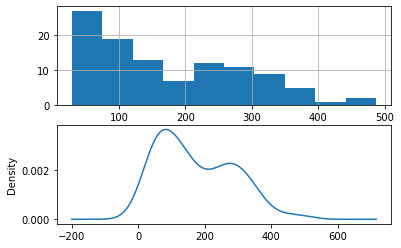

In [7]:
#plot histogram and denisty plot
plt.figure(1)
plt.subplot(211)
data_set.hist()
plt.subplot(212)
data_set.plot(kind='kde')
plt.show()

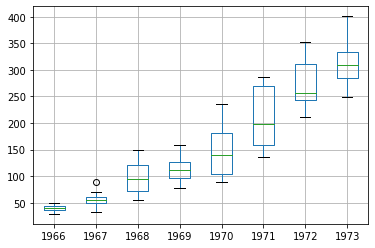

In [8]:
#group data by year for box plot analysis
#1974 only has 10 months and not a full year, so we exclude it
grps = data_set['1966':'1973'].groupby(pd.Grouper(freq='A'))
yrs = pd.DataFrame({name.year: grp.values for name, grp in grps})
yrs.boxplot()
plt.show()

In [14]:
#Implement an ARIMA model to forecast the number of robberies over time
#first check for stationarity of the data set using the augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

#check if stationary using Dickey-Fuller
result = adfuller(data_set.values)
print(f'ADF Statistic: {result[0]: .3f}')
print(f'p-value: {result[1]: .3f}')
print(f'Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic:  0.797
p-value:  0.992
Critical Values:
	1%: -3.503
	5%: -2.893
	10%: -2.584
